In [0]:
# Author: Julianna Cole <jec56@njit.edu>
#         Rhea Pavithran <rp553@njit.edu>
# Class: IS 465-002
# Assignment: Classify documents using NPL


# The purpose of this program is topic extraction, which allows readers to 
# identify key terms in an article or document. This allows the reader to
# quickly determine what the content of the document is about, saving them
# time from having to read it in its entirety. Both Frobenius norm and the
# generalized Kullback-Leibler divergence are used for NMF
# (Non-negative Matrix Factorization), which is a tool for analyzing data and
# automatically extracting meaningful information. These are different methods
# for classifying text in a given document and detecing a particular topic
# for the extracted words.


# ------------------------------------------------------------------------
# The first section of this code loads the dataset, extracts data from it,
# and displays the amount of time it took to complete each method in seconds.

from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# ------------------------------------------------------------------------
# What does the code do?
# After loading the datasets and vectorizing them, the code analyzes the 
# language used while eliminating common words as well as headers, footers,
# and quoted replies. 

# If a word is common between documents, they are removed.
# This is because the code will be able to identify unique words across
# all documents in order to identify the common theme. 

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))


# ------------------------------------------------------------------------
# Use tf-idf (term frequency-inverse document frequency) features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))


# ------------------------------------------------------------------------
# Use tf (term frequency) features for LDA (Latent Dirichlet Allocation).
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()


# ------------------------------------------------------------------------
# Fit the NMF (Non-Negative Matrix Factorization) model.
# This section of code utilizes Frobenius norm to output the data.
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


# ------------------------------------------------------------------------
# Fit the NMF (Non-Negative Matrix Factorization) model.
# This section of code utilizes the generalized Kullback-Leibler divergence
# to output the data.
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


# ------------------------------------------------------------------------
# Fit the LDA (Latent Dirichlet Allocation) model.
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 14.560s.
Extracting tf-idf features for NMF...
done in 0.344s.
Extracting tf features for LDA...
done in 0.355s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.391s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp 

Automatically created module for IPython interactive environment
LLE: 0.19 sec
LTSA: 0.27 sec
Hessian LLE: 0.37 sec
Modified LLE: 0.3 sec
Isomap: 0.58 sec
MDS: 2.3 sec
SE: 0.15 sec
t-SNE: 8.1 sec


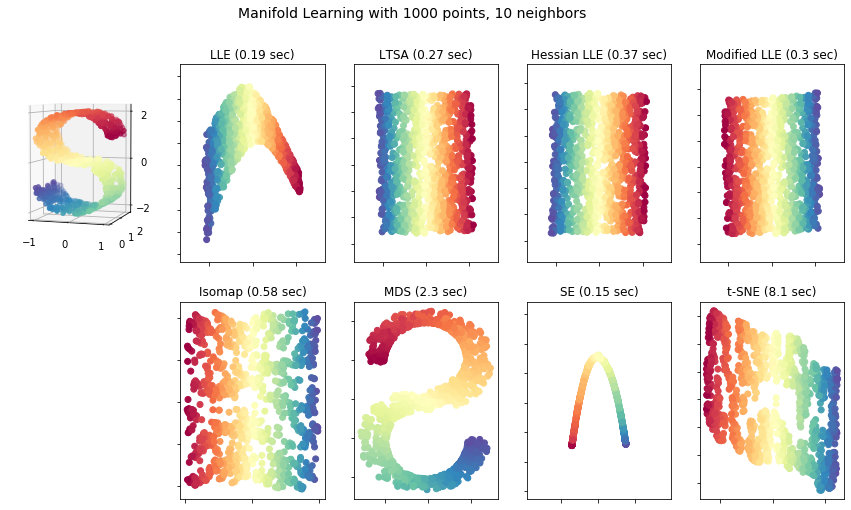

In [0]:
# This is a visualization of the S-curve dataset (3D) after undergoing different 
# manifold learning methods (2D).
# While the first block of code provides a linear output of words extracted
# from the dataset based on use frequency, this block of code shows us that 
# data can also be represented in a more dynamic way with these graphics.

# ------------------------------------------------------------------------
print(__doc__)

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

Axes3D


# ------------------------------------------------------------------------
# This section defines the variables in the code and makes the object
# for the basic S curve.
n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2


# ------------------------------------------------------------------------
# These lines specify the dimensions of the entire graphic as well as the 
# title, which changes with the dataset.
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


# ------------------------------------------------------------------------
# This section created the 3D scatter plot on the left side of the graphic.
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)


# ------------------------------------------------------------------------
# In this section, all eight manifold methods are applied to the dataset.
# The result is an output of eight graphs with descriptive titles.
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)


# ------------------------------------------------------------------------
# Finally, this section specifies details of the X and Y axes as well as the
# amount of time it takes to apply the manifold method to the dataset for
# each graph.
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

In [0]:
# This section of code is used to create a list of words in a dataset and their
# frequency. The data is presented in a String with each word along with
# its frequency, which is added using an incrementing counter, 
# within the specified dataset.

wordlist = data_samples[0].split()
BigString = ' '.join(data_samples)
wordfreq = []
for w in BigString:
    wordfreq.append(wordlist.count(w))
str(list(zip(wordlist,wordfreq)))

'[(\'Well\', 0), ("i\'m", 0), (\'not\', 0), (\'sure\', 0), (\'about\', 0), (\'the\', 0), (\'story\', 0), (\'nad\', 0), (\'it\', 0), (\'did\', 0), (\'seem\', 0), (\'biased.\', 0), (\'What\', 0), (\'I\', 0), (\'disagree\', 0), (\'with\', 0), (\'is\', 0), (\'your\', 0), (\'statement\', 3), (\'that\', 0), (\'the\', 0), (\'U.S.\', 0), (\'Media\', 0), (\'is\', 0), (\'out\', 0), (\'to\', 0), (\'ruin\', 0), (\'Israels\', 0), (\'reputation.\', 0), (\'That\', 0), (\'is\', 0), (\'rediculous.\', 0), (\'The\', 0), (\'U.S.\', 0), (\'media\', 0), (\'is\', 3), (\'the\', 0), (\'most\', 0), (\'pro-israeli\', 0), (\'media\', 0), (\'in\', 0), (\'the\', 0), (\'world.\', 0), (\'Having\', 0), (\'lived\', 0), (\'in\', 0), (\'Europe\', 0), (\'I\', 0), (\'realize\', 0), (\'that\', 0), (\'incidences\', 0), (\'such\', 0), (\'as\', 3), (\'the\', 0), (\'one\', 0), (\'described\', 0), (\'in\', 0), (\'the\', 0), (\'letter\', 0), (\'have\', 0), (\'occured.\', 3), (\'The\', 0), (\'U.S.\', 0), (\'media\', 3), (\'as\', 0